In [4]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score #To calculate the best Cluster to use.

In [ ]:
!pip install hvplot

In [43]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("/content/crypto_market_data.csv", index_col="coin_id")
# Display sample data
df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [44]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [45]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [46]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df)
df_scaler

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [47]:
# Create a DataFrame with the scaled data
df_scaler = pd.DataFrame(df_scaler, columns= df.columns)
# Copy the crypto names from the original data
# Set the coinid column as index
df_scaler.index=df.index
# Display sample data
df_scaler

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [48]:
# Create a list with the number of k-values from 1 to 11
k_range = range(1,11)

In [50]:
# Create an empty list to store the inertia values
inertia = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_range:
    k_model = KMeans(n_clusters=k, random_state=10)
    k_model.fit(df_scaler)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Axes: >

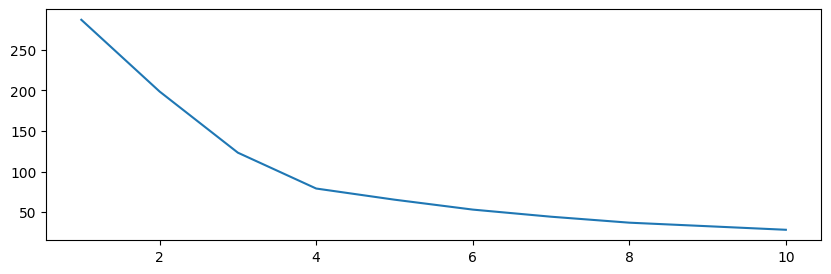

In [52]:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pd.Series(inertia, index=k_range).plot(figsize=[10,3])

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** The elbow is in 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [53]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=10)

In [54]:
# Fit the K-Means model using the scaled data
k_model.fit(df_scaler)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=10)

In [55]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_predictions = k_model.predict(df_scaler)
# Print the resulting array of cluster values.
print('Kmeans Score: ', calinski_harabasz_score(df_scaler, k_predictions))

Kmeans Score:  32.45985294262567


In [56]:
df_scaler.assign(cluster = k_predictions).hvplot.line(x='coin_id', by='cluster')

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [57]:
kp_df=pd.DataFrame(k_predictions)
kp_df.index=df.index
kp_df

,0
coin_id,
bitcoin,3
ethereum,3
tether,0
ripple,0
bitcoin-cash,3
binancecoin,3
chainlink,3
cardano,3
litecoin,3


In [58]:
# Create a copy of the DataFrame
# Add a new column to the DataFrame with the predicted clusters
# Display sample data
df_2 = pd.concat([df_scaler, kp_df], axis=1)
df_2

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,0
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,3
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,3


In [59]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_2.assign(
    cluster = k_predictions
    ).hvplot.scatter(
        x='price_change_percentage_24h',
        y='price_change_percentage_7d',
        by='cluster',
        hover_cols='coin_id')

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [60]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [61]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
rate_pca = pca.fit_transform(df_scaler)
# View the first five rows of the DataFrame.
rate_pca_df = pd.DataFrame(rate_pca)
rate_pca_df.index=kp_df.index
rate_pca_df

,0,1,2
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [62]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
print('PCA variance:', sum(pca.explained_variance_ratio_))

PCA variance: 0.895031657030984


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** # 89.5 %

In [63]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
ndf_pca = rate_pca_df.copy()
# Display sample data
ndf_pca

,0,1,2
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [64]:
# Create a list with the number of k-values from 1 to 11
k_range = range(1,11)

In [66]:
# Create an empty list to store the inertia values
inertia = []
# Create a for loop to compute the inertia with each possible value of k
for k in k_range:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
    k_model = KMeans(n_clusters=k, random_state=10)
    k_model.fit(ndf_pca)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Axes: >

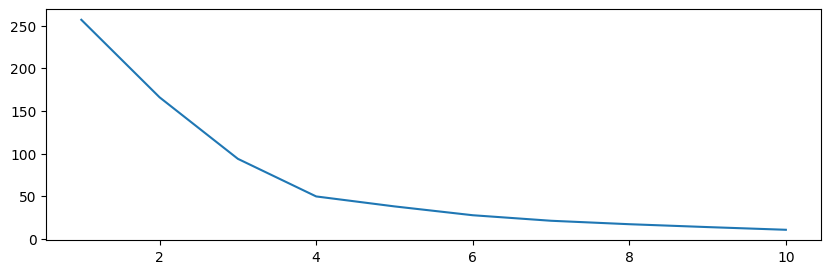

In [67]:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pd.Series(inertia, index=k_range).plot(figsize=[10,3])

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The number 4 with PCA.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, is the same in PCA or without PCA.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [68]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=10)

In [69]:
# Fit the K-Means model using the PCA data
k_model.fit(ndf_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=10)

In [70]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_predictions = k_model.predict(ndf_pca)
# Print the resulting array of cluster values.
print('Kmeans Score: ', calinski_harabasz_score(ndf_pca, k_predictions))

Kmeans Score:  51.455693970984484


In [71]:
ndf_pca

,0,1,2
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [72]:
# Create a copy of the DataFrame with the PCA data
kp_df=pd.DataFrame(k_predictions)
kp_df.index=df.index
kp_df.rename(columns={0: 'clusters'}, inplace=True)
kp_df

,clusters
coin_id,
bitcoin,3
ethereum,3
tether,0
ripple,0
bitcoin-cash,3
binancecoin,3
chainlink,3
cardano,3
litecoin,3


In [73]:
# Add a new column to the DataFrame with the predicted clusters
ndf_pcaC = pd.concat([ndf_pca, kp_df], axis=1)
# Display sample data
ndf_pcaC.rename(columns={0: 'PC1'}, inplace=True)
ndf_pcaC.rename(columns={1: 'PC2'}, inplace=True)
ndf_pcaC.rename(columns={2: 'PC3'}, inplace=True)
ndf_pcaC

,PC1,PC2,PC3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3
binancecoin,-0.516534,1.388377,0.804071,3
chainlink,-0.450711,0.517699,2.846143,3
cardano,-0.345600,0.729439,1.478013,3
litecoin,-0.649468,0.432165,0.600303,3


In [74]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
ndf_pcaC.assign(
    cluster = k_predictions
    ).hvplot.scatter(
        x='PC1',
        y='PC2',
        by='clusters',
        hover_cols='coin_id'
        )

:NdOverlay   [clusters]
   :Scatter   [PC1]   (PC2,coin_id)

In [75]:
import plotly.express as px

fig = px.scatter_3d(
    ndf_pcaC,
    title='Cluster Cryptocurrencies with K-means Using the PCA Data',
    x='PC1',
    y='PC2',
    z='PC3',
    # hover_data='coin_id',
    color='clusters')
fig.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

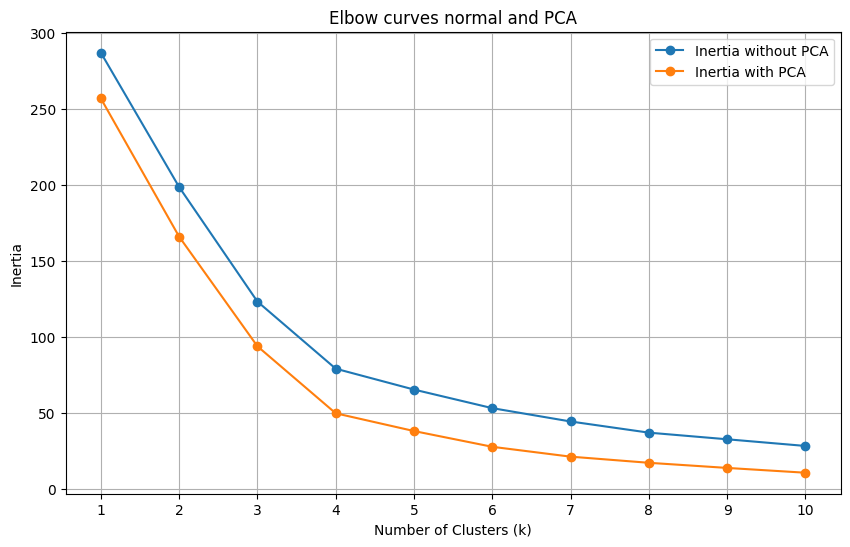

In [77]:
import matplotlib.pyplot as plt
# Composite plot to contrast the Elbow curves
k_range = range(1,11)
inertia_n = []
inertia_pca = []

for k in k_range:
    k_model = KMeans(n_clusters=k, random_state=10)
    k_model.fit(df_scaler)
    inertia_n.append(k_model.inertia_)

for k in k_range:
    k_model = KMeans(n_clusters=k, random_state=10)
    k_model.fit(ndf_pca)
    inertia_pca.append(k_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_n, marker='o', label='Inertia without PCA')
plt.plot(k_range, inertia_pca, marker='o', label='Inertia with PCA')

plt.title('Elbow curves normal and PCA')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

# Composite plot to contrast the clusters

In [78]:
df_scaler.assign(cluster = k_predictions).hvplot.line(x='coin_id', by='cluster')
# without PCA

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [79]:
ndf_pca.assign(cluster = k_predictions).hvplot.line(x='coin_id', by='cluster')
# with PCA

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  we can run a more efficien saving the most relevant data only.